In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [0]:
##load fashion mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [38]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.3688 - val_loss: 0.3302
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.3209 - val_loss: 0.3190
Epoch 3/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.3115 - val_loss: 0.3088
Epoch 4/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.3064 - val_loss: 0.3106
Epoch 5/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.3034 - val_loss: 0.2999
Epoch 6/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.3012 - val_loss: 0.3008
Epoch 7/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.2992 - val_loss: 0.3042
Epoch 8/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.2976 - val_loss: 0.3007
Epoch 9/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.2963 - val_loss: 0.3

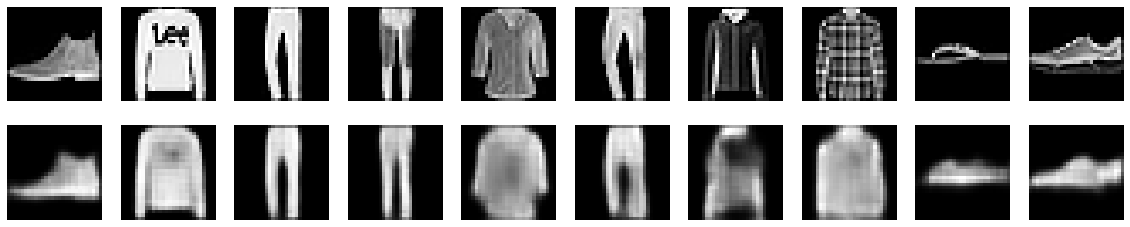

In [39]:
autoencoder.save('Antoencoder.h5')
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

cnn

In [40]:
from keras.utils import np_utils

#Processing class labels they are currently a numeric vector
#transform them into categories
print(y_train.shape)
print(y_train[:10])
#Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
#Check the shape
print(Y_train.shape)


(60000,)
[9 0 0 3 0 2 7 2 5 5]
(60000, 10)


In [41]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten

model = Sequential()
#CNN input layer: input_shape: (depth,width,height)
#CNN convolution: number of filters, height and width of kernel
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
print(model.output_shape)

#Next we add the remaining layers with 2 by 2 Maxpooling layer and 0.2 Dropout rate
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))

model.add(Dropout(0.2))

#Setting up the fully connected layer with 64 Dense nodes, and 0.2 Dropout rate
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

#Class layer
model.add(Dense(10, activation='softmax'))
print(model.summary())

(None, 26, 26, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                65

In [42]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Fit the model
model.fit(x_train, Y_train,
          epochs=10,
          batch_size=128,
          verbose = 1)

#Evaluate the model
score = model.evaluate(x_test, Y_test, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.4761 - acc: 0.8332
Epoch 2/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.3065 - acc: 0.8899
Epoch 3/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.2546 - acc: 0.9059
Epoch 4/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.2231 - acc: 0.9179
Epoch 5/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1934 - acc: 0.9281
Epoch 6/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.1677 - acc: 0.9367
Epoch 7/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.1492 - acc: 0.9448
Epoch 8/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1311 - acc: 0.9506
Epoch 9/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.1171 - acc: 0.9562
Epoch 10/10
10000/10000 [==============================] - 1s 121us/step


In [43]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27056675517559053
Test accuracy: 0.9166


In [44]:

predicted_values = model.predict_classes(x_test[0:2**9], batch_size=32, verbose=1)
pd.crosstab(predicted_values, y_test[0:2**9],
            rownames=['Predicted Value'], colnames= ['True Value'])

512/512 [==============================] - 0s 753us/step


True Value,0,1,2,3,4,5,6,7,8,9
Predicted Value,,,,,,,,,,
0,48,0,2,0,0,0,1,0,0,0
1,0,53,0,1,0,0,0,0,0,0
2,2,0,60,0,2,0,3,0,0,0
3,0,0,0,40,4,0,1,0,0,0
4,0,0,3,3,51,0,4,0,0,0
5,0,0,0,0,0,40,0,1,0,1
6,6,0,6,2,1,0,38,0,1,0
7,0,0,0,0,0,0,0,45,0,3
8,0,0,0,0,0,0,0,0,44,0


In [0]:
#transfer learning
from keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [5]:
#minimum input size
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))

58892288/58889256 [==============================] - 1s 0us/step


In [47]:
add_model = Sequential()
add_model.add(conv_base)
add_model.add(Flatten())
add_model.add(Dense(256, activation="relu"))
add_model.add(Dropout(0.25))
add_model.add(Dense(128, activation="relu"))
add_model.add(Dropout(0.25))
add_model.add(Dense(10, activation='softmax'))
conv_base.trainable = False
add_model.trainable_weights
add_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])
add_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total para

In [9]:
#duplicate images in 3 channels
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

x_train = np.dstack([x_train] * 3)
x_test = np.dstack([x_test] * 3)

x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape (-1, 28, 28, 3)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])/255.
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])/255.

x_train.shape, x_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [10]:
add_model.fit(x_train, Y_train,
          epochs=10,
          batch_size=128,
          verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.7198 - acc: 0.7434
Epoch 2/10
60000/60000 [==============================] - 36s 601us/step - loss: 0.5066 - acc: 0.8171
Epoch 3/10
60000/60000 [==============================] - 36s 601us/step - loss: 0.4657 - acc: 0.8315
Epoch 4/10
60000/60000 [==============================] - 36s 598us/step - loss: 0.4421 - acc: 0.8397
Epoch 5/10
60000/60000 [==============================] - 36s 592us/step - loss: 0.4225 - acc: 0.8447
Epoch 6/10
60000/60000 [==============================] - 35s 592us/step - loss: 0.4094 - acc: 0.8503
Epoch 7/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.3954 - acc: 0.8539
Epoch 8/10
60000/60000 [==============================] - 35s 591us/step - loss: 0.3870 - acc: 0.8574
Epoch 9/10
60000/60000 [==============================] - 36s 592us/step - loss: 0.3781 - acc: 0.8610
Epoch 10/10
60000/60000 [==============================] - 35s 589us/step - loss: 

In [11]:
#Evaluating the model
score = add_model.evaluate(x_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 907us/step
Test loss: 0.41426338639259336
Test accuracy: 0.8531


text classification

In [16]:
df_benigh = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')
df_malicious = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt', header = None)
df_benigh.columns = ['urls']
print(df_benigh.shape)
df_benigh.head()

(66056, 1)


,urls
0,.0.blogger.gmodules.com
1,.0.client-channel.google.com
2,.0.docs.google.com
3,.0.drive.google.com
4,.0.gvt0.cn


In [18]:
df_malicious.columns = ['urls']
print(df_malicious.shape)
df_malicious.head()

(1296, 1)


,urls
0,.1337x.pl
1,.1link.io
2,.1n.pm
3,.22apple.com
4,.22find.com


rnn

In [19]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, Embedding
df_benigh['class'] = 1
df_malicious['class'] = 0
np.random.seed(0)

# Downsizing the major class samples due to the extreme imbalance of the dataset
x_1 = df_benigh.sample(frac=5*df_malicious.shape[0]/df_benigh.shape[0]) #5:1
x_1.shape

(6480, 2)

In [0]:
df = pd.concat([x_1, df_malicious], ignore_index = True).reset_index()
tokenizer = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(df['urls'])

X_train = tokenizer.texts_to_sequences(df['urls'])
y_train = df['class']
#y_train = np_utils.to_categorical(df['class'], 2)

max_features = 1000
maxlen = df['urls'].str.len().max()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
input_train = sequence.pad_sequences(X_train, maxlen)
input_test = sequence.pad_sequences(X_test, maxlen)
input_test.shape

(2333, 86)

rnn

In [0]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 64))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])


In [26]:
rnn_model.fit(input_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
5443/5443 [==============================] - 44s 8ms/step - loss: 0.1793 - acc: 0.9298
Epoch 2/10
5443/5443 [==============================] - 42s 8ms/step - loss: 0.0739 - acc: 0.9745
Epoch 3/10
5443/5443 [==============================] - 43s 8ms/step - loss: 0.0602 - acc: 0.9814
Epoch 4/10
5443/5443 [==============================] - 43s 8ms/step - loss: 0.0526 - acc: 0.9838
Epoch 5/10
5443/5443 [==============================] - 43s 8ms/step - loss: 0.0481 - acc: 0.9848
Epoch 6/10
5443/5443 [==============================] - 44s 8ms/step - loss: 0.0458 - acc: 0.9860
Epoch 7/10
5443/5443 [==============================] - 43s 8ms/step - loss: 0.0412 - acc: 0.9866
Epoch 8/10
5443/5443 [==============================] - 43s 8ms/step - loss: 0.0401 - acc: 0.9871
Epoch 9/10
5443/5443 [==============================] - 45s 8ms/step - loss: 0.0365 - acc: 0.9899
Epoch 10/10
5443/5443 [==============================] - 45s 8ms/step - loss: 0.0366 - acc: 0.9881


In [27]:
rnn_model.save('rnn_model.f5')
score = rnn_model.evaluate(input_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2333/2333 [==============================] - 1s 630us/step
Test loss: 0.06846918630985759
Test accuracy: 0.9841405917941067


cnn

In [28]:
from keras.layers import Conv1D

cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 64, input_length = maxlen))
cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 86, 64)            64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 84, 32)            6176      
_________________________________________________________________
flatten_2 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2689      
Total params: 72,865
Trainable params: 72,865
Non-trainable params: 0
_________________________________________________________________


In [29]:
cnn_model.fit(input_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
5443/5443 [==============================] - 6s 1ms/step - loss: 0.1890 - acc: 0.9173
Epoch 2/10
5443/5443 [==============================] - 5s 855us/step - loss: 0.0711 - acc: 0.9792
Epoch 3/10
5443/5443 [==============================] - 5s 966us/step - loss: 0.0639 - acc: 0.9827
Epoch 4/10
5443/5443 [==============================] - 5s 863us/step - loss: 0.0605 - acc: 0.9835
Epoch 5/10
5443/5443 [==============================] - 5s 962us/step - loss: 0.0540 - acc: 0.9853
Epoch 6/10
5443/5443 [==============================] - 5s 846us/step - loss: 0.0505 - acc: 0.9846
Epoch 7/10
5443/5443 [==============================] - 5s 916us/step - loss: 0.0491 - acc: 0.9857
Epoch 8/10
5443/5443 [==============================] - 5s 921us/step - loss: 0.0459 - acc: 0.9871
Epoch 9/10
5443/5443 [==============================] - 5s 932us/step - loss: 0.0438 - acc: 0.9882
Epoch 10/10
5443/5443 [==============================] - 5s 886us/step - loss: 0.0444 - acc: 0.9868


In [30]:
score = cnn_model.evaluate(input_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2333/2333 [==============================] - 0s 162us/step
Test loss: 0.07333180559835002
Test accuracy: 0.982426060916935


In [0]:
from sklearn.metrics import roc_curve

y_pred_rnn = rnn_model.predict(input_test).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)

y_pred_cnn = cnn_model.predict(input_test).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)

from sklearn.metrics import auc
auc_rnn = auc(fpr_rnn, tpr_rnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

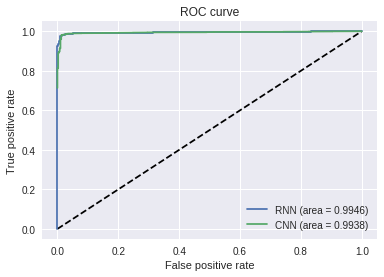

In [32]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.4f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.4f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
